# Resistanceゲームをプレイする参加者のグループ間の議論中に行われる相互作用のネットワーク

対応する動画：[NetworkXを使って社会ネットワークの実データを可視化する！【研究で使うPython #27】](https://youtu.be/sUZjDQYEvUE)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import networkx as nx
import time
import csv

プレイヤー数: 7


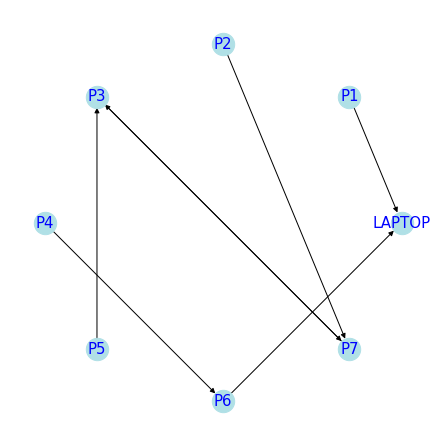

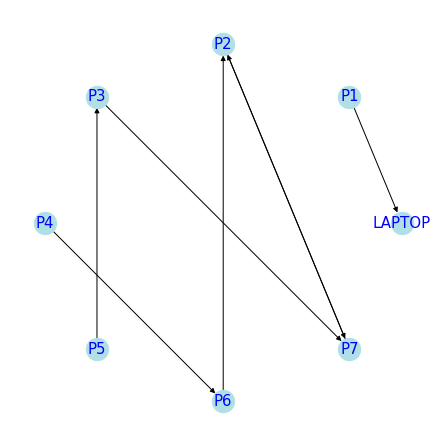

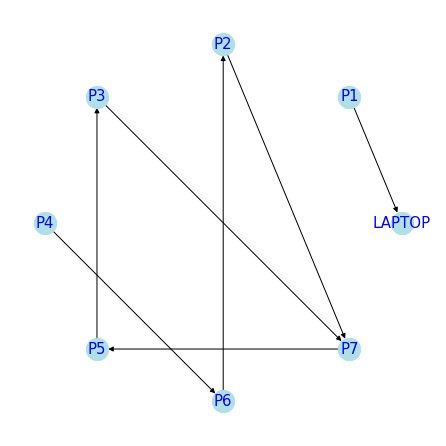

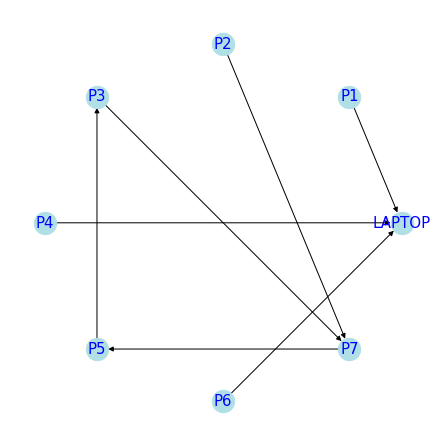

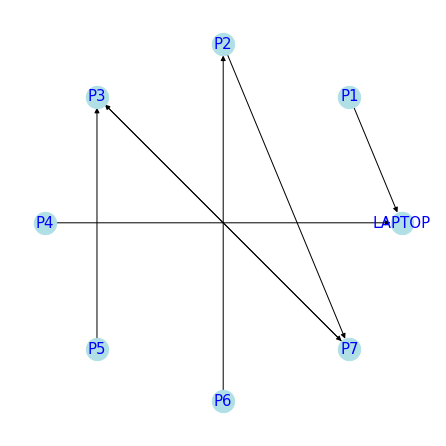

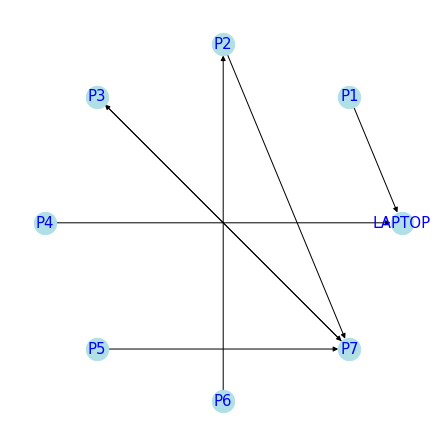

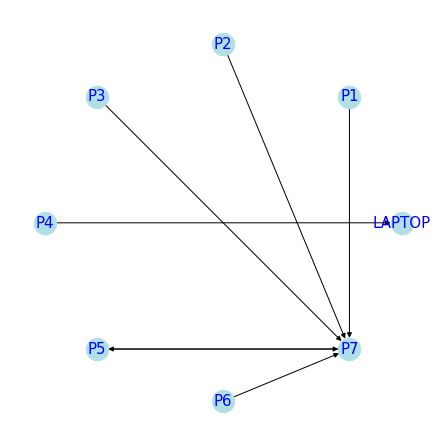

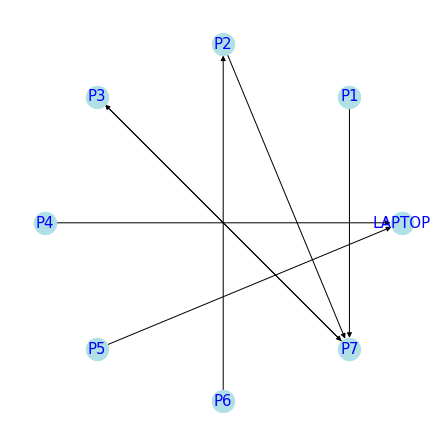

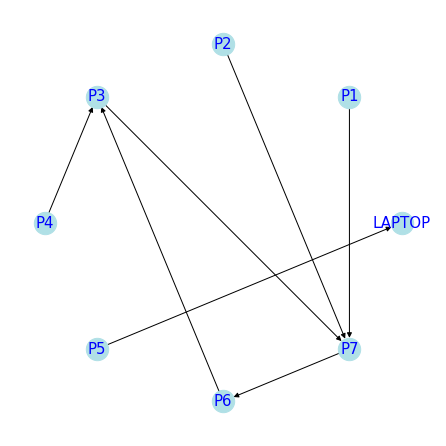

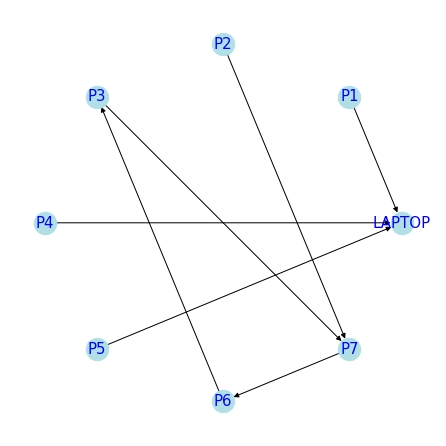

In [2]:
network_num = 0 # ネットワークナンバー(0~61の任意の値に変更可能)

N = 0       # ノード数
node_names = ['LAPTOP','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10'] # ノードの名前のリスト
Glist = []  # グラフリスト

with open("network_list.csv", "r") as f:
    reader = csv.reader(f)
    line = [row for row in reader]
    N = int(line [ network_num+1 ][1])+1   # ノード数を取得（プレイヤー数＋laptop）
    print("プレイヤー数:",N-1)


G = nx.DiGraph()
for i in range(N):
    G.add_node(node_names[i])  # ノード作成


with open("network/network"+str(network_num)+".csv", "r") as f:
    reader = csv.reader(f)
    next(reader)
    line = [row for row in reader]
    #print(line)
    for t in line:
        for j in range(N-1):
            for k in range(N):
                if int(t[k+j*N+1])==1:
                    G.add_edge(node_names[j+1], node_names[k])
        Glist.append(nx.Graph.copy(G))
        G = nx.create_empty_copy(G)
        

ts = 0 # タイムステップ
for g in Glist:   
    fig=plt.figure(figsize=(6,6))
    pos = nx.circular_layout(g)
    nx.draw(g, pos, node_size=500, node_color='powderblue', width=1, font_size=15, font_color='b',with_labels=True)
    plt.show()
    ts += 1
    if ts==10:
        break